In [638]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Seaborn is a Python visualization library based on Matplotlib and is designed to make it easier to create attractive and informative statistical graphics.

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
#converting a collection of raw documents into a matrix of TF-IDF features.

import os
#provides a way of using operating system-dependent functionality such as reading or writing to the file system, managing file paths, and interacting with the operating system itself.
from scipy.sparse import coo_matrix
#used to create and work with sparse matrices in a Coordinate List (COO) format.

In [640]:
data = pd.read_csv("E:\\Y3S1\\IRWA\\IRWA(Project)\\marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv",sep='\t')
data.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

In [641]:
missing_values = data.isnull().sum()

In [644]:
missing_values

Uniq Id                               0
Crawl Timestamp                       0
Dataset Origin                     5000
Product Id                            0
Product Barcode                    5000
Product Company Type Source           0
Product Brand Source               4861
Product Brand Normalised Source    4861
Product Name Source                4861
Match Rank                         5000
Match Score                        5000
Match Type                         5000
Retailer                              0
Product Category                     10
Product Brand                        13
Product Name                          0
Product Price                        42
Sku                                5000
Upc                                5000
Product Url                           0
Market                                0
Product Description                1127
Product Currency                      0
Product Available Inventory           0
Product Image Url                     0


In [647]:
# Step 1: Drop columns with too many missing values
columns_to_drop = ['Dataset Origin', 'Product Barcode', 'Product Brand Source', 'Product Brand Normalised Source',
                   'Product Name Source', 'Match Rank', 'Match Score', 'Match Type', 'Sku', 'Upc', 
                   'Product Model Number', 'Product Contents', 'Bsr']

O_data = data.drop(columns=columns_to_drop)

# Fill missing values in 'Product Rating' with a default value (e.g., 0)
O_data['Product Rating'].fillna(0, inplace=True)
# Fill missing values in 'Product Reviews Count' with a default value (e.g., 0)
O_data['Product Reviews Count'].fillna(0, inplace=True)
# Fill missing values in 'Product Category' with a default value (e.g., 'Unknown')
O_data['Product Category'].fillna('', inplace=True)
# Fill missing values in 'Product Brand' with a default value (e.g., 'Unknown')
O_data['Product Brand'].fillna('', inplace=True)
# Fill missing values in 'Product Description' with an empty string
O_data['Product Description'].fillna('', inplace=True)

# Verify the results
O_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Uniq Id                      5000 non-null   object 
 1   Crawl Timestamp              5000 non-null   object 
 2   Product Id                   5000 non-null   object 
 3   Product Company Type Source  5000 non-null   object 
 4   Retailer                     5000 non-null   object 
 5   Product Category             5000 non-null   object 
 6   Product Brand                5000 non-null   object 
 7   Product Name                 5000 non-null   object 
 8   Product Price                4958 non-null   float64
 9   Product Url                  5000 non-null   object 
 10  Market                       5000 non-null   object 
 11  Product Description          5000 non-null   object 
 12  Product Currency             5000 non-null   object 
 13  Product Available 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2600\2462889671.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  O_data['Product Rating'].fillna(0, inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2600\2462889671.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [650]:
O_data.columns


Index(['Uniq Id', 'Crawl Timestamp', 'Product Id',
       'Product Company Type Source', 'Retailer', 'Product Category',
       'Product Brand', 'Product Name', 'Product Price', 'Product Url',
       'Market', 'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url', 'Product Tags',
       'Product Rating', 'Product Reviews Count', 'Joining Key'],
      dtype='object')

In [652]:
O_data.shape

(5000, 19)

In [654]:
O_data.isnull().sum()

Uniq Id                         0
Crawl Timestamp                 0
Product Id                      0
Product Company Type Source     0
Retailer                        0
Product Category                0
Product Brand                   0
Product Name                    0
Product Price                  42
Product Url                     0
Market                          0
Product Description             0
Product Currency                0
Product Available Inventory     0
Product Image Url               0
Product Tags                    0
Product Rating                  0
Product Reviews Count           0
Joining Key                     0
dtype: int64

In [656]:
columns_to_drop = ['Retailer', 'Market', 'Product Url', 'Product Available Inventory',
                   'Product Currency']

dataO = O_data.drop(columns=columns_to_drop)

In [659]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'O_data' is your original DataFrame

# List of categorical columns
categorical_columns = [
    'Uniq Id', 'Crawl Timestamp', 'Product Id', 'Product Company Type Source', 
    'Retailer', 'Product Category', 'Product Brand', 'Product Name', 
    'Product Url', 'Market', 'Product Description', 
    'Product Currency', 'Product Image Url', 'Product Tags', 
    'Joining Key'
]

# Create a copy of O_data to save the encoded data in 'data_cleaned'
data_cleaned = O_data.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding for all categorical columns
for col in categorical_columns:
    if col in data_cleaned.columns:  # Check if the column exists in the DataFrame
        data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col].astype(str))

# Check the data types after encoding
print(data_cleaned.dtypes)


Uniq Id                          int32
Crawl Timestamp                  int32
Product Id                       int32
Product Company Type Source      int32
Retailer                         int32
Product Category                 int32
Product Brand                    int32
Product Name                     int32
Product Price                  float64
Product Url                      int32
Market                           int32
Product Description              int32
Product Currency                 int32
Product Available Inventory      int64
Product Image Url                int32
Product Tags                     int32
Product Rating                 float64
Product Reviews Count          float64
Joining Key                      int32
dtype: object


In [662]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Uniq Id                      5000 non-null   int32  
 1   Crawl Timestamp              5000 non-null   int32  
 2   Product Id                   5000 non-null   int32  
 3   Product Company Type Source  5000 non-null   int32  
 4   Retailer                     5000 non-null   int32  
 5   Product Category             5000 non-null   int32  
 6   Product Brand                5000 non-null   int32  
 7   Product Name                 5000 non-null   int32  
 8   Product Price                4958 non-null   float64
 9   Product Url                  5000 non-null   int32  
 10  Market                       5000 non-null   int32  
 11  Product Description          5000 non-null   int32  
 12  Product Currency             5000 non-null   int32  
 13  Product Available 

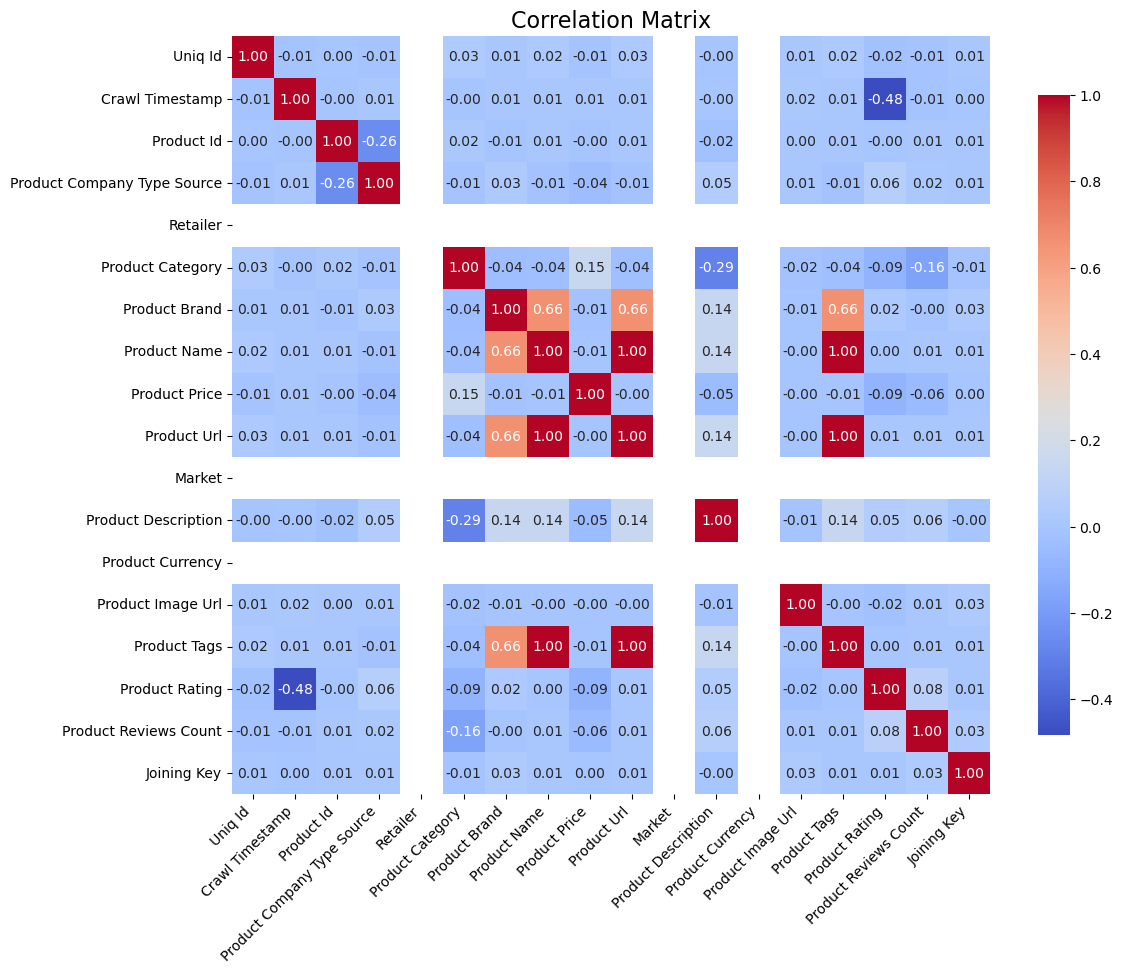

In [663]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Ensure your data contains only numeric columns
numeric_data = data_cleaned.select_dtypes(include=['float64', 'int32'])

# Step 2: Calculate the correlation matrix on the numeric DataFrame
correlation_matrix = numeric_data.corr()

# Step 3: Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Step 4: Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Step 5: Set title and labels
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Step 6: Show the plot
plt.show()


In [664]:
# Step 1: Select upper triangle of the correlation matrix
upper = correlation_matrix.abs().where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Step 2: Find features with correlation greater than the threshold
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]



In [666]:
# Drop the specified columns
columns_to_drop = ['Product Currency', 'Product Available Inventory', 'Market', 'Retailer','Product Url']
data = data_cleaned.drop(columns=columns_to_drop)

# Check the result
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Uniq Id                      5000 non-null   int32  
 1   Crawl Timestamp              5000 non-null   int32  
 2   Product Id                   5000 non-null   int32  
 3   Product Company Type Source  5000 non-null   int32  
 4   Product Category             5000 non-null   int32  
 5   Product Brand                5000 non-null   int32  
 6   Product Name                 5000 non-null   int32  
 7   Product Price                4958 non-null   float64
 8   Product Description          5000 non-null   int32  
 9   Product Image Url            5000 non-null   int32  
 10  Product Tags                 5000 non-null   int32  
 11  Product Rating               5000 non-null   float64
 12  Product Reviews Count        5000 non-null   float64
 13  Joining Key       

In [670]:
print(data.columns)

Index(['Uniq Id', 'Crawl Timestamp', 'Product Id',
       'Product Company Type Source', 'Product Category', 'Product Brand',
       'Product Name', 'Product Price', 'Product Description',
       'Product Image Url', 'Product Tags', 'Product Rating',
       'Product Reviews Count', 'Joining Key'],
      dtype='object')


In [674]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Uniq Id                      5000 non-null   int32  
 1   Crawl Timestamp              5000 non-null   int32  
 2   Product Id                   5000 non-null   int32  
 3   Product Company Type Source  5000 non-null   int32  
 4   Product Category             5000 non-null   int32  
 5   Product Brand                5000 non-null   int32  
 6   Product Name                 5000 non-null   int32  
 7   Product Price                4958 non-null   float64
 8   Product Description          5000 non-null   int32  
 9   Product Image Url            5000 non-null   int32  
 10  Product Tags                 5000 non-null   int32  
 11  Product Rating               5000 non-null   float64
 12  Product Reviews Count        5000 non-null   float64
 13  Joining Key       

In [675]:
dataO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Uniq Id                      5000 non-null   object 
 1   Crawl Timestamp              5000 non-null   object 
 2   Product Id                   5000 non-null   object 
 3   Product Company Type Source  5000 non-null   object 
 4   Product Category             5000 non-null   object 
 5   Product Brand                5000 non-null   object 
 6   Product Name                 5000 non-null   object 
 7   Product Price                4958 non-null   float64
 8   Product Description          5000 non-null   object 
 9   Product Image Url            5000 non-null   object 
 10  Product Tags                 5000 non-null   object 
 11  Product Rating               5000 non-null   float64
 12  Product Reviews Count        5000 non-null   float64
 13  Joining Key       

Text(0.5, 1.0, 'Most Popular items')

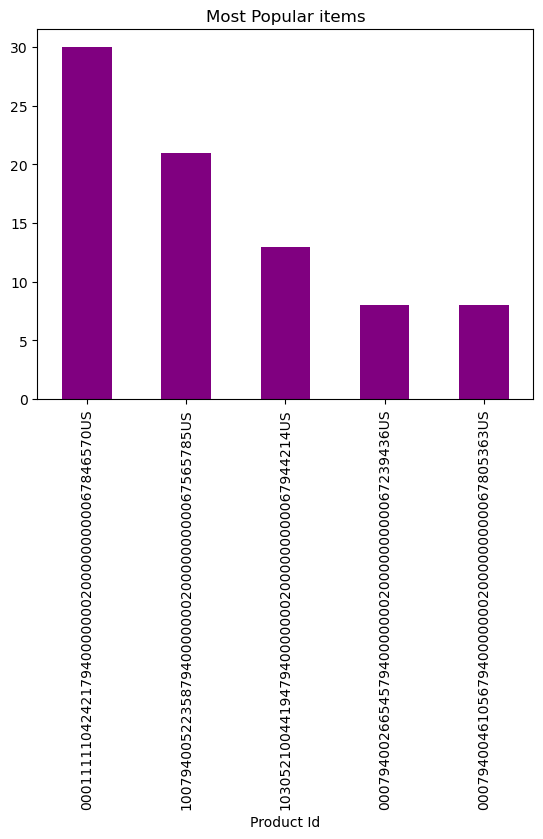

In [677]:
# Most popular items
popular_items = dataO['Product Id'].value_counts().head(5)
popular_items.plot(kind='bar',color='purple')
plt.title("Most Popular items")

<Axes: xlabel='Product Rating'>

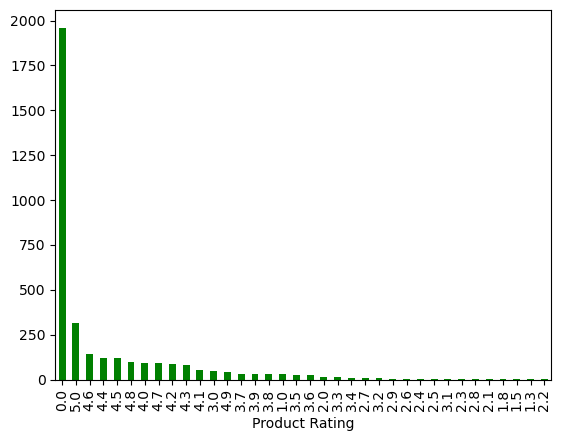

In [679]:
# most rated counts
train_data['Product Rating'].value_counts().plot(kind='bar',color='green')

In [680]:
dataO.groupby(['Product Name'])['Product Rating'].mean()

Product Name
$6 Mail-In Rebate Available Braun Epilator Silk-epil 3-270 with Bikini Trimmer and 3 Extras                           4.5
($100 Value) Peter Thomas Roth Thermal Therapy Duo Skincare Kit                                                       5.0
($11 Value) Love Beauty and Planet Coconut Water Mimosa & Lavender Argan Oil Hand Cream Holiday Gift Set 2 Ct         0.0
($125 Value) Impressions Vanity Touch Pro LED Makeup Mirror with Wireless Bluetooth Audio & USB Charger, Rose Gold    2.5
($129 Value) CHI G2 Ceramic Titanium Infused Hairstyling Flat Iron Straightener, 1&quot                               4.4
                                                                                                                     ... 
wet n wild Photo Focus Correcting Palette, Color Commentary                                                           3.3
wet n wild Photo Focus Liquid Foundation, Medium Dark, Matte, Desert Beige, 1 fl oz                                   0.0
wet n wild 

In [681]:
average_ratings = dataO.groupby(['Product Name','Product Reviews Count','Product Brand','Product Image Url'])['Product Rating'].mean().reset_index()


In [682]:
top_rated_items = average_ratings.sort_values(by='Product Rating', ascending=False)

rating_base_recommendation = top_rated_items.head(10)
rating_base_recommendation

,Product Name,Product Reviews Count,Product Brand,Product Image Url,Product Rating
1686,"Electric Shaver, Triple Shaving Time Electric ...",4.0,Moosoo,https://i5.walmartimages.com/asr/e7dcd553-90df...,5.0
526,"Alaffia Body Lotion, Vanilla, 32 Oz",2.0,Alaffia,https://i5.walmartimages.com/asr/2988c323-cb6f...,5.0
2053,"Gold Bond Ultimate Ultimate Healing Lotion, Al...",2.0,Gold Bond,https://i5.walmartimages.com/asr/34b610e7-05db...,5.0
4716,"Versace Man Eau Fraiche Eau De Toilette Spray,...",24.0,Versace,https://i5.walmartimages.com/asr/edaaeed5-9da0...,5.0
2058,Goldwell StyleSign 1 Flat Marvel Straightening...,2.0,Goldwell,https://i5.walmartimages.com/asr/3bf90289-6980...,5.0
3842,"Red Devil 0322 Steel Wool # 00 Very Fine, 8 Pa...",1.0,Red Devil,https://i5.walmartimages.com/asr/60bfe5ba-774c...,5.0
510,"Air Wick Plug in Starter Kit, Warmer + 1 Refil...",1.0,Air Wick,https://i5.walmartimages.com/asr/0fac65b2-c6aa...,5.0
3841,Recovery Complex Anti-Frizz Shine Serum by Bai...,4.0,Bain de Terre,https://i5.walmartimages.com/asr/fcdb4d2e-3727...,5.0
2687,Long Aid Extra Dry Formula Curl Activator Gel ...,12.0,Long Aid,https://i5.walmartimages.com/asr/f7f29199-bfa5...,5.0
2062,"Good Sense 60-Day Air Care System, Citrus, 2 o...",1.0,Diversey,https://i5.walmartimages.com/asr/025a7068-7bb1...,5.0


In [684]:
rating_base_recommendation['Product Rating'] = rating_base_recommendation['Product Rating'].astype(int)
rating_base_recommendation['Product Reviews Count'] = rating_base_recommendation['Product Reviews Count'].astype(int)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2600\822269010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['Product Rating'] = rating_base_recommendation['Product Rating'].astype(int)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2600\822269010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['Product Reviews Count'] = rating_base_recommendation['Product Reviews Count'].astype(int)


In [685]:
rating_base_recommendation

,Product Name,Product Reviews Count,Product Brand,Product Image Url,Product Rating
1686,"Electric Shaver, Triple Shaving Time Electric ...",4,Moosoo,https://i5.walmartimages.com/asr/e7dcd553-90df...,5
526,"Alaffia Body Lotion, Vanilla, 32 Oz",2,Alaffia,https://i5.walmartimages.com/asr/2988c323-cb6f...,5
2053,"Gold Bond Ultimate Ultimate Healing Lotion, Al...",2,Gold Bond,https://i5.walmartimages.com/asr/34b610e7-05db...,5
4716,"Versace Man Eau Fraiche Eau De Toilette Spray,...",24,Versace,https://i5.walmartimages.com/asr/edaaeed5-9da0...,5
2058,Goldwell StyleSign 1 Flat Marvel Straightening...,2,Goldwell,https://i5.walmartimages.com/asr/3bf90289-6980...,5
3842,"Red Devil 0322 Steel Wool # 00 Very Fine, 8 Pa...",1,Red Devil,https://i5.walmartimages.com/asr/60bfe5ba-774c...,5
510,"Air Wick Plug in Starter Kit, Warmer + 1 Refil...",1,Air Wick,https://i5.walmartimages.com/asr/0fac65b2-c6aa...,5
3841,Recovery Complex Anti-Frizz Shine Serum by Bai...,4,Bain de Terre,https://i5.walmartimages.com/asr/fcdb4d2e-3727...,5
2687,Long Aid Extra Dry Formula Curl Activator Gel ...,12,Long Aid,https://i5.walmartimages.com/asr/f7f29199-bfa5...,5
2062,"Good Sense 60-Day Air Care System, Citrus, 2 o...",1,Diversey,https://i5.walmartimages.com/asr/025a7068-7bb1...,5


In [686]:
dataO.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Product Id',
       'Product Company Type Source', 'Product Category', 'Product Brand',
       'Product Name', 'Product Price', 'Product Description',
       'Product Image Url', 'Product Tags', 'Product Rating',
       'Product Reviews Count', 'Joining Key'],
      dtype='object')

In [690]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectorizer.fit_transform(dataO['Product Tags'])

<5000x7084 sparse matrix of type '<class 'numpy.float64'>'
	with 67589 stored elements in Compressed Sparse Row format>

In [691]:
tfidf_matrix_content = tfidf_vectorizer.fit_transform(dataO['Product Tags'])
cosine_similarities_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)


In [692]:
cosine_similarities_content

array([[1.        , 0.01317493, 0.01182614, ..., 0.10132348, 0.01249521,
        0.04414909],
       [0.01317493, 1.        , 0.40297257, ..., 0.00605861, 0.01205174,
        0.04258219],
       [0.01182614, 0.40297257, 1.        , ..., 0.03722526, 0.01081794,
        0.03822285],
       ...,
       [0.10132348, 0.00605861, 0.03722526, ..., 1.        , 0.00574604,
        0.02030237],
       [0.01249521, 0.01205174, 0.01081794, ..., 0.00574604, 1.        ,
        0.04038529],
       [0.04414909, 0.04258219, 0.03822285, ..., 0.02030237, 0.04038529,
        1.        ]])

In [693]:
dataO['Product Name'][2]

'Clairol Nice N Easy Permanent Color 7/106A Natural Dark Neutral Blonde, 1.0 KIT'

In [694]:
item_name = 'Clairol Nice N Easy Permanent Color 7/106A Natural Dark Neutral Blonde, 1.0 KIT'
item_index = dataO[dataO['Product Name']==item_name].index[0]


In [695]:
cosine_similarities_content[item_index]
#This line retrieves the similarity scores for the item located at item_index against all other items in your dataset.

array([0.01182614, 0.40297257, 1.        , ..., 0.03722526, 0.01081794,
       0.03822285])

In [696]:
enumerate(cosine_similarities_content[item_index])

In [697]:
similar_items = list(enumerate(cosine_similarities_content[item_index]))


In [698]:
similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items = similar_items[1:10]

In [699]:
top_similar_items

[(883, 0.7151488028462636),
 (646, 0.6572166729672899),
 (3571, 0.5540690051904059),
 (1267, 0.5122143338653338),
 (197, 0.4911386864186568),
 (3077, 0.48362654203599004),
 (3901, 0.4798518191109799),
 (3283, 0.4726583440872403),
 (766, 0.46025578061614103)]

In [700]:
[x[0] for x in top_similar_items]

[883, 646, 3571, 1267, 197, 3077, 3901, 3283, 766]

In [701]:
recommended_items_indics = [x[0] for x in top_similar_items]

In [702]:
dataO.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Product Id',
       'Product Company Type Source', 'Product Category', 'Product Brand',
       'Product Name', 'Product Price', 'Product Description',
       'Product Image Url', 'Product Tags', 'Product Rating',
       'Product Reviews Count', 'Joining Key'],
      dtype='object')

In [704]:
dataO.iloc[recommended_items_indics][['Product Name','Product Reviews Count','Product Brand']]


,Product Name,Product Reviews Count,Product Brand
883,"Clairol Nice n Easy Permanent Hair Color, Natu...",29216.0,Clairol
646,Clairol nice n easy permanent hair color 4/120...,29221.0,Clairol
3571,Clairol Nice N Easy Permanent Hair Color Creme...,28382.0,Clairol
1267,Clairol Nicen Easy Permanent Hair Color Crème ...,27658.0,Clairol
197,Clairol Nice N Easy Permanent Color 6G/116A Na...,29221.0,Clairol
3077,Clairol Nice n Easy Sun-Kissed Permanent Hair ...,29242.0,Clairol
3901,Clairol Nice n Easy Permanent Hair Color Creme...,28382.0,Clairol
3283,Clairol Nice n Easy Permanent Hair Color Creme...,28392.0,Clairol
766,Clairol Nicen Easy Permanent Hair Color Crème ...,28678.0,Clairol


In [709]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(dataO, item_name, top_n=10):
    # Check if the item name exists in the training data
    if item_name not in dataO['Product Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Create a TF-IDF vectorizer for item descriptions
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Apply TF-IDF vectorization to item descriptions
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(dataO['Product Tags'])

    # Calculate cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = dataO[dataO['Product Name'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n+1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Get the details of the top similar items
    recommended_items_details = dataO.iloc[recommended_item_indices][['Product Name', 'Product Reviews Count', 'Product Brand', 'Product Image Url', 'Product Rating']]

    return recommended_items_details

In [710]:
# Example: Get content-based recommendations for a specific item
item_name = 'Clairol Nice N Easy Permanent Color 7/106A Natural Dark Neutral Blonde, 1.0 KIT'
content_based_rec = content_based_recommendations(dataO, item_name, top_n=8)

content_based_rec

,Product Name,Product Reviews Count,Product Brand,Product Image Url,Product Rating
883,"Clairol Nice n Easy Permanent Hair Color, Natu...",29216.0,Clairol,https://i5.walmartimages.com/asr/815395cc-87a5...,4.5
646,Clairol nice n easy permanent hair color 4/120...,29221.0,Clairol,https://i5.walmartimages.com/asr/924961cf-23ac...,4.5
3571,Clairol Nice N Easy Permanent Hair Color Creme...,28382.0,Clairol,https://i5.walmartimages.com/asr/9ced8de9-d057...,4.5
1267,Clairol Nicen Easy Permanent Hair Color Crème ...,27658.0,Clairol,https://i5.walmartimages.com/asr/cbda81b9-75a6...,4.5
197,Clairol Nice N Easy Permanent Color 6G/116A Na...,29221.0,Clairol,https://i5.walmartimages.com/asr/8ede5176-2b60...,4.5
3077,Clairol Nice n Easy Sun-Kissed Permanent Hair ...,29242.0,Clairol,https://i5.walmartimages.com/asr/8adedd89-c601...,0.0
3901,Clairol Nice n Easy Permanent Hair Color Creme...,28382.0,Clairol,https://i5.walmartimages.com/asr/2a775298-9f91...,4.5
3283,Clairol Nice n Easy Permanent Hair Color Creme...,28392.0,Clairol,https://i5.walmartimages.com/asr/52068b89-c6ed...,4.5


In [712]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets (80% train, 20% test)
train_data, test_data = train_test_split(dataO, test_size=0.3, random_state=42)


In [713]:
train_data.shape

(3500, 14)

In [714]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Content-based recommendation function remains the same
def content_based_recommendations(train_data, item_name, top_n=10):
    # Check if the item name exists in the training data
    if item_name not in train_data['Product Name'].values:
        return pd.DataFrame()
    
    # Create a TF-IDF vectorizer for item tags
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Product Tags'])
    
    # Calculate cosine similarity
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)
    
    # Find the index of the item
    item_index = train_data[train_data['Product Name'] == item_name].index[0]
    
    # Get similarity scores for this item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))
    
    # Sort by similarity score
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)
    
    # Get top N recommendations, excluding the item itself
    top_similar_items = similar_items[1:top_n+1]
    
    # Get indices of recommended items
    recommended_item_indices = [x[0] for x in top_similar_items]
    
    # Return the recommended item details
    return train_data.iloc[recommended_item_indices][['Product Name', 'Product Reviews Count', 'Product Brand']]



In [728]:
def evaluate_recommendations_without_k(recommendations, test_data, all_items):
    # Get the list of items in the test set
    test_items = test_data['Product Name'].values
    
    # Get the list of recommended items
    recommended_items = recommendations['Product Name'].values
    
    # Calculate the overlap between the recommended items and the test items
    relevant_items_in_test = len(set(recommended_items).intersection(set(test_items)))
    
    # Precision: How many of the recommended items are in the test set
    precision = relevant_items_in_test / len(recommended_items) if len(recommended_items) > 0 else 0
    
    # Recall: How many of the test items are in the recommended list
    recall = relevant_items_in_test / len(test_items) if len(test_items) > 0 else 0
    
    # F1 Score: Harmonic mean of precision and recall
    if precision + recall == 0:
        f1_score = 0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)
    
    # Accuracy: The proportion of correct recommendations (true positives + true negatives) 
    total_items = len(all_items)  # Total unique items available
    true_positives = relevant_items_in_test
    false_positives = len(recommended_items) - true_positives
    false_negatives = len(test_items) - true_positives
    true_negatives = total_items - (true_positives + false_positives + false_negatives)
    
    accuracy = (true_positives + true_negatives) / total_items if total_items > 0 else 0
    
    return precision, recall, f1_score, accuracy

# Example usage
item_name = "Clairol Nice N Easy Permanent Color 7/106A Natural Dark Neutral Blonde, 1.0 KIT"
recommendations = content_based_recommendations(train_data, item_name, top_n=10)

# Assuming 'all_items' is a list of all product names in the dataset
all_items = train_data['Product Name'].unique()

# Evaluate the recommendations based on overlap with the test data
precision, recall, f1_score, accuracy = evaluate_recommendations_without_k(recommendations, test_data, all_items)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print(f"Accuracy: {accuracy}")


Precision: 0.1
Recall: 0.0006666666666666666
F1 Score: 0.0013245033112582781
Accuracy: 0.5641618497109827


In [722]:
def evaluate_recommendations_without_k(recommendations, test_data, all_items):
    # Get the list of items in the test set
    test_items = test_data['Product Name'].values
    
    # Get the list of recommended items
    recommended_items = recommendations['Product Name'].values
    
    # Calculate the overlap between the recommended items and the test items
    relevant_items_in_test = len(set(recommended_items).intersection(set(test_items)))
    
    # Precision: How many of the recommended items are in the test set
    precision = relevant_items_in_test / len(recommended_items) if len(recommended_items) > 0 else 0
    
    # Recall: How many of the test items are in the recommended list
    recall = relevant_items_in_test / len(test_items) if len(test_items) > 0 else 0
    
    # F1 Score: Harmonic mean of precision and recall
    if precision + recall == 0:
        f1_score = 0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)
    
    # Accuracy: The proportion of correct recommendations (true positives + true negatives) 
    total_items = len(all_items)  # Total unique items available
    true_positives = relevant_items_in_test
    false_positives = len(recommended_items) - true_positives
    false_negatives = len(test_items) - true_positives
    true_negatives = total_items - (true_positives + false_positives + false_negatives)
    
    accuracy = (true_positives + true_negatives) / total_items if total_items > 0 else 0
    
    return precision, recall, f1_score, accuracy


item_name = "Nice-n-Easy-Permanent-Color-111-Natural-Medium-Auburn-1-ea-Pack-of-3"
recommendations = content_based_recommendations(train_data, item_name, top_n=10)

# Assuming 'all_items' is a list of all product names in the dataset
all_items = train_data['Product Name'].unique()

# Evaluate the recommendations based on overlap with the test data
precision, recall, f1_score, accuracy = evaluate_recommendations_without_k(recommendations, test_data, all_items)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print(f"Accuracy: {accuracy}")


KeyError: 'Product Name'